In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
Tesla = yf.Ticker("TSLA")
Tesla_data = Tesla.history(period="max")
print(Tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-09-05 00:00:00-04:00  223.490005  235.000000  222.250000  230.169998   
2024-09-06 00:00:00-04:00  232.600006  233.600006  210.509995  210.729996   
2024-09-09 00:00:00-04:00  216.199997  219.869995  213.669998  216.270004   
2024-09-10 00:00:00-04:00  220.070007  226.399994  218.639999  226.169998   
2024-09-11 00:00:00-04:00  224.429993  228.410004  216.800293  228.130005   

In [5]:
Tesla_data.reset_index(inplace=True) 
Tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
URL = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(URL).text
print(html_data)

In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')
print(soup.get_text())

In [ ]:
tables = soup.find_all('table')
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenues"])
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():

        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            date = col[0].text
            Revenues = col[1].text
            Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame({"Date":[date], "Revenues":[Revenues]})], ignore_index=True)
            print( Tesla_revenue )
            

In [13]:
Tesla_revenue["Revenues"] = Tesla_revenue['Revenues'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dkds1\AppData\Local\Temp\ipykernel_8476\1514421206.py:1: SyntaxWarning: invalid escape sequence '\$'
  Tesla_revenue["Revenues"] = Tesla_revenue['Revenues'].str.replace(',|\$',"", regex=True)


In [23]:
Tesla_revenue.dropna(inplace=True)

Tesla_revenue = Tesla_revenue[Tesla_revenue['Revenues'] != ""]
Tesla_revenue

,Date,Revenues
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [17]:
Tesla_revenue.tail()

,Date,Revenues
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


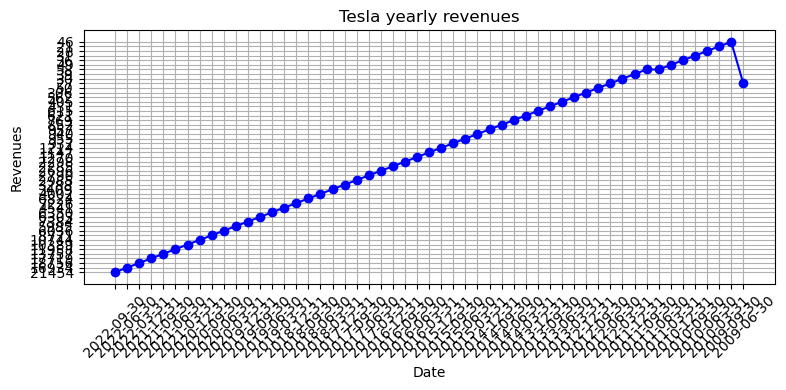

In [41]:
def make_graph(df, x_Axis, y_Axis, title):
    plt.figure(figsize=(8, 4))
    plt.plot(df[x_Axis], df[y_Axis], marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenues')
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout()       
    plt.show()
make_graph(Tesla_revenue, x_Axis='Date', y_Axis='Revenues', title='Tesla yearly revenues')


In [ ]:
game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")
print(gme_data)

In [45]:
gme_data.reset_index(inplace=True) 
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
URL = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data2 = requests.get(URL).text
soup = BeautifulSoup(html_data2, 'html.parser')
print(soup.get_text())

In [ ]:
tables = soup.find_all('table')
gme_revenue = pd.DataFrame(columns=["Date", "Revenues"])
for table in tables:
    if "Quarterly Revenue" in table.get_text():

        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            date = col[0].text
            Revenues = col[1].text
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenues":[Revenues]})], ignore_index=True)
            print( gme_revenue )
            

In [51]:
gme_revenue["Revenues"] = gme_revenue['Revenues'].str.replace(',|\$',"", regex=True)



<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dkds1\AppData\Local\Temp\ipykernel_8476\2766286159.py:1: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenues"] = gme_revenue['Revenues'].str.replace(',|\$',"", regex=True)


In [53]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenues'] != ""]

In [55]:
gme_revenue.tail()

,Date,Revenues
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


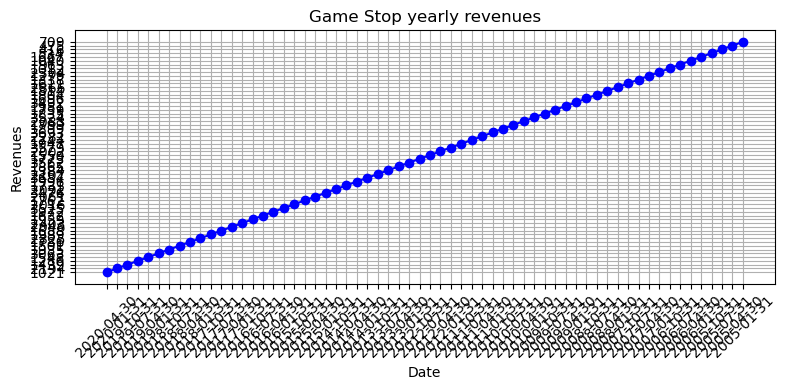

In [59]:
def make_graph(df, x_Axis, y_Axis, title):
    plt.figure(figsize=(8, 4))
    plt.plot(df[x_Axis], df[y_Axis], marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenues')
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout()       
    plt.show()
make_graph(gme_revenue, x_Axis='Date', y_Axis='Revenues', title='Game Stop yearly revenues')
